In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_order = ['room_2','street_3', 'technology_1', 'street_1', 'animals_1', 'landscape_1', 'sport_2', 'street_4', 'room_1',
               'transport_2', 'food_1','transport_1', 'animals_3', 'street_2', 'room_3', 'sport_1', 'food_3','animals_2', 'transport_3', 'food_2']

In [3]:
#image_types

interior_room = ['animals_1','room_1','room_2','room_3']

interior_specific  = ['animals_3','food_1','food_2','food_3', 'technology_1']

exterior_urban = ['sport_1','street_1','street_2','street_3','street_4','transport_1', 'transport_2', 'transport_3']

exterior_nature = ['animals_2', 'landscape_1', 'sport_2']
                   
#Dudas en sport_1 y transport_2 animals_1

In [4]:
image_order_by_type=['animals_1','room_1','room_2','room_3','animals_3','food_1','food_2','food_3', 'technology_1','sport_1','street_1','street_2',
                     'street_3','street_4','transport_1', 'transport_2', 'transport_3','animals_2', 'landscape_1', 'sport_2']

In [5]:
image_order_with_type=['animals_1(room)','room_1(room)','room_2(room)','room_3(room)',
                     'animals_3(specific)','food_1(specific)','food_2(specific)','food_3(specific)', 'technology_1(specific)',
                     'sport_1(urban)','street_1(urban)','street_2(urban)','street_3(urban)','street_4(urban)','transport_1(urban)', 'transport_2(urban)', 'transport_3(urban)',
                     'animals_2(nature)', 'landscape_1(nature)', 'sport_2(nature)']

In [6]:
df_1 = pd.read_csv('./Test A.csv', sep=',').fillna('')
df_2 = pd.read_csv('./Test B.csv', sep=',').fillna('')
df_1.head()
num_respuestas = min(len(df_1),len(df_2))

In [7]:
cols = df_1.columns
dfs = []
for j, df in enumerate([df_1, df_2]):
    for i, col in enumerate(df.columns[1:]):
        resp = list(df[col])
        #resp.extend(list(df_2[col]))
        resp = [j for i in [x.split(';') for x in resp] for j in i]
        df_i = pd.DataFrame(resp, columns=['question'])
        df_i['count'] = [1]*len(df_i)
        df_i = df_i.groupby(by='question').sum().reset_index()
        df_i['image'] = [f"{image_order[i+j*10]}"]*len(df_i)
        dfs.append(df_i)

data = dfs[0]
for df in dfs[1:]:
    data = pd.concat([data, df], axis=0).reset_index(drop=True)

In [8]:
n_rec = 4

with open('../question_recuperation/test_questions.txt', 'r') as file:
    lines = file.readlines()

l_for_df = []    
    
for i in range(20):
    image_lines = lines[i*11:(i+11)*11]
    image = image_lines[0].strip()
    for i in range(4):
        model = image_lines[2*(i+1)].strip()
        all_questions = eval(image_lines[2*(i+1)+1].strip())
        questions_rec = all_questions[:n_rec]

        for q in questions_rec:
            l_for_df.append([image,model,q])
        

models_df = pd.DataFrame(l_for_df, columns = ['image','model','question'])

baseline = ['What airline should you fly?', 'Is there a shark in the water?', 'What game is on the TV?', 'Is this a kitchen?']

for image in models_df['image'].unique():
    for question in baseline:
        models_df.loc[len(models_df.index)] = [image, 'baseline', question] 

In [9]:
final_df = pd.merge(models_df, data, left_on=['image','question'], right_on=['image','question'])

In [10]:
type_vector = []
subtype_vector = []
for img in final_df['image']:
    if img in interior_room:
        subtype_vector.append('interior_room')
        type_vector.append('interior')
    elif img in interior_specific:
        subtype_vector.append('interior_specific')
        type_vector.append('interior')
    elif img in exterior_urban:
        subtype_vector.append('exterior_urban')
        type_vector.append('exterior')
    else:
        subtype_vector.append('exterior_nature')
        type_vector.append('exterior')
final_df['type'] = type_vector
final_df['subtype'] = subtype_vector

In [11]:
final_df[final_df['image'] == 'technology_1']

,image,model,question,count,type,subtype
219,technology_1,RNet_size_set,What site is the computer browsing?,33,interior,interior_specific
220,technology_1,RNet_size_set,What color is the mug?,1,interior,interior_specific
221,technology_1,RNet_size_set,What kind of laptop is this?,65,interior,interior_specific
222,technology_1,RNet_set,Is this a desktop or laptop?,72,interior,interior_specific
223,technology_1,Embed,Is this a desktop or laptop?,72,interior,interior_specific
224,technology_1,RNet_set,Is this a keyboard?,50,interior,interior_specific
225,technology_1,Embed,How many screens are there?,59,interior,interior_specific
226,technology_1,Embed,What is sitting on either side of the computer?,58,interior,interior_specific
227,technology_1,Embed,How many computers are there?,71,interior,interior_specific
228,technology_1,Pixel,What is the weather like?,2,interior,interior_specific


In [54]:
final_df['count'].sum()/(80+68)/10

7.077027027027027

In [55]:
for image in pd.Series(image_order).sort_values():
    print('--------------------------------------')
    print(f'{image}\n')
    image_df = final_df[final_df['image'] == image]
    print(image_df.groupby(by='model').sum()['count'])

--------------------------------------
animals_1

model
Embed            239
Pixel             69
RNet_set         168
RNet_size_set    200
baseline          35
Name: count, dtype: int64
--------------------------------------
animals_2

model
Embed            150
Pixel             52
RNet_set         132
RNet_size_set    181
baseline           2
Name: count, dtype: int64
--------------------------------------
animals_3

model
Embed             64
Pixel             34
RNet_set         140
RNet_size_set    201
baseline           5
Name: count, dtype: int64
--------------------------------------
food_1

model
Embed            187
Pixel             18
RNet_set         123
RNet_size_set    154
baseline          21
Name: count, dtype: int64
--------------------------------------
food_2

model
Embed            159
Pixel              4
RNet_set         164
RNet_size_set    147
baseline          15
Name: count, dtype: int64
--------------------------------------
food_3

model
Embed            1

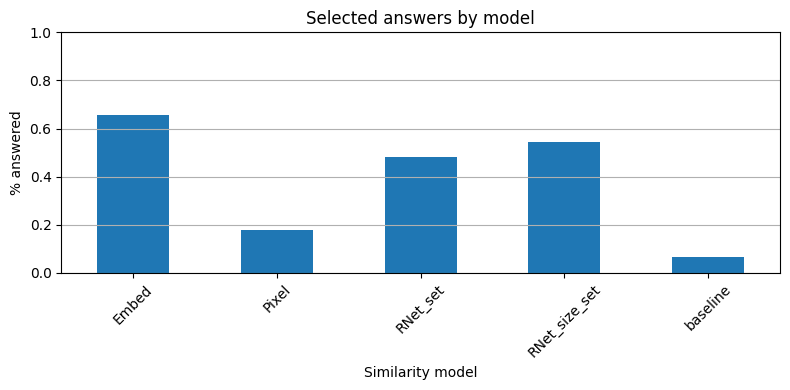

In [56]:
# Plotting the grouped sum counts
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
df_bymodel = final_df.groupby(by='model').sum()['count']
df_bymodel_prop = df_bymodel/(num_respuestas*4*20)
df_bymodel_prop.plot(kind='bar')
plt.title('Selected answers by model')
plt.grid(axis='y')  # Add gridlines to y-axis
plt.xlabel('Similarity model')
plt.ylabel('% answered')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot
plt.savefig('sum_counts_by_sim.png')  # Save as PNG image with 300 DPI
plt.show()

In [57]:
df_bymodel_prop

model
Embed            0.655331
Pixel            0.177757
RNet_set         0.482169
RNet_size_set    0.545772
baseline         0.064338
Name: count, dtype: float64

In [58]:
np.array(image_order_by_type)

array(['animals_1', 'room_1', 'room_2', 'room_3', 'animals_3', 'food_1',
       'food_2', 'food_3', 'technology_1', 'sport_1', 'street_1',
       'street_2', 'street_3', 'street_4', 'transport_1', 'transport_2',
       'transport_3', 'animals_2', 'landscape_1', 'sport_2'], dtype='<U12')

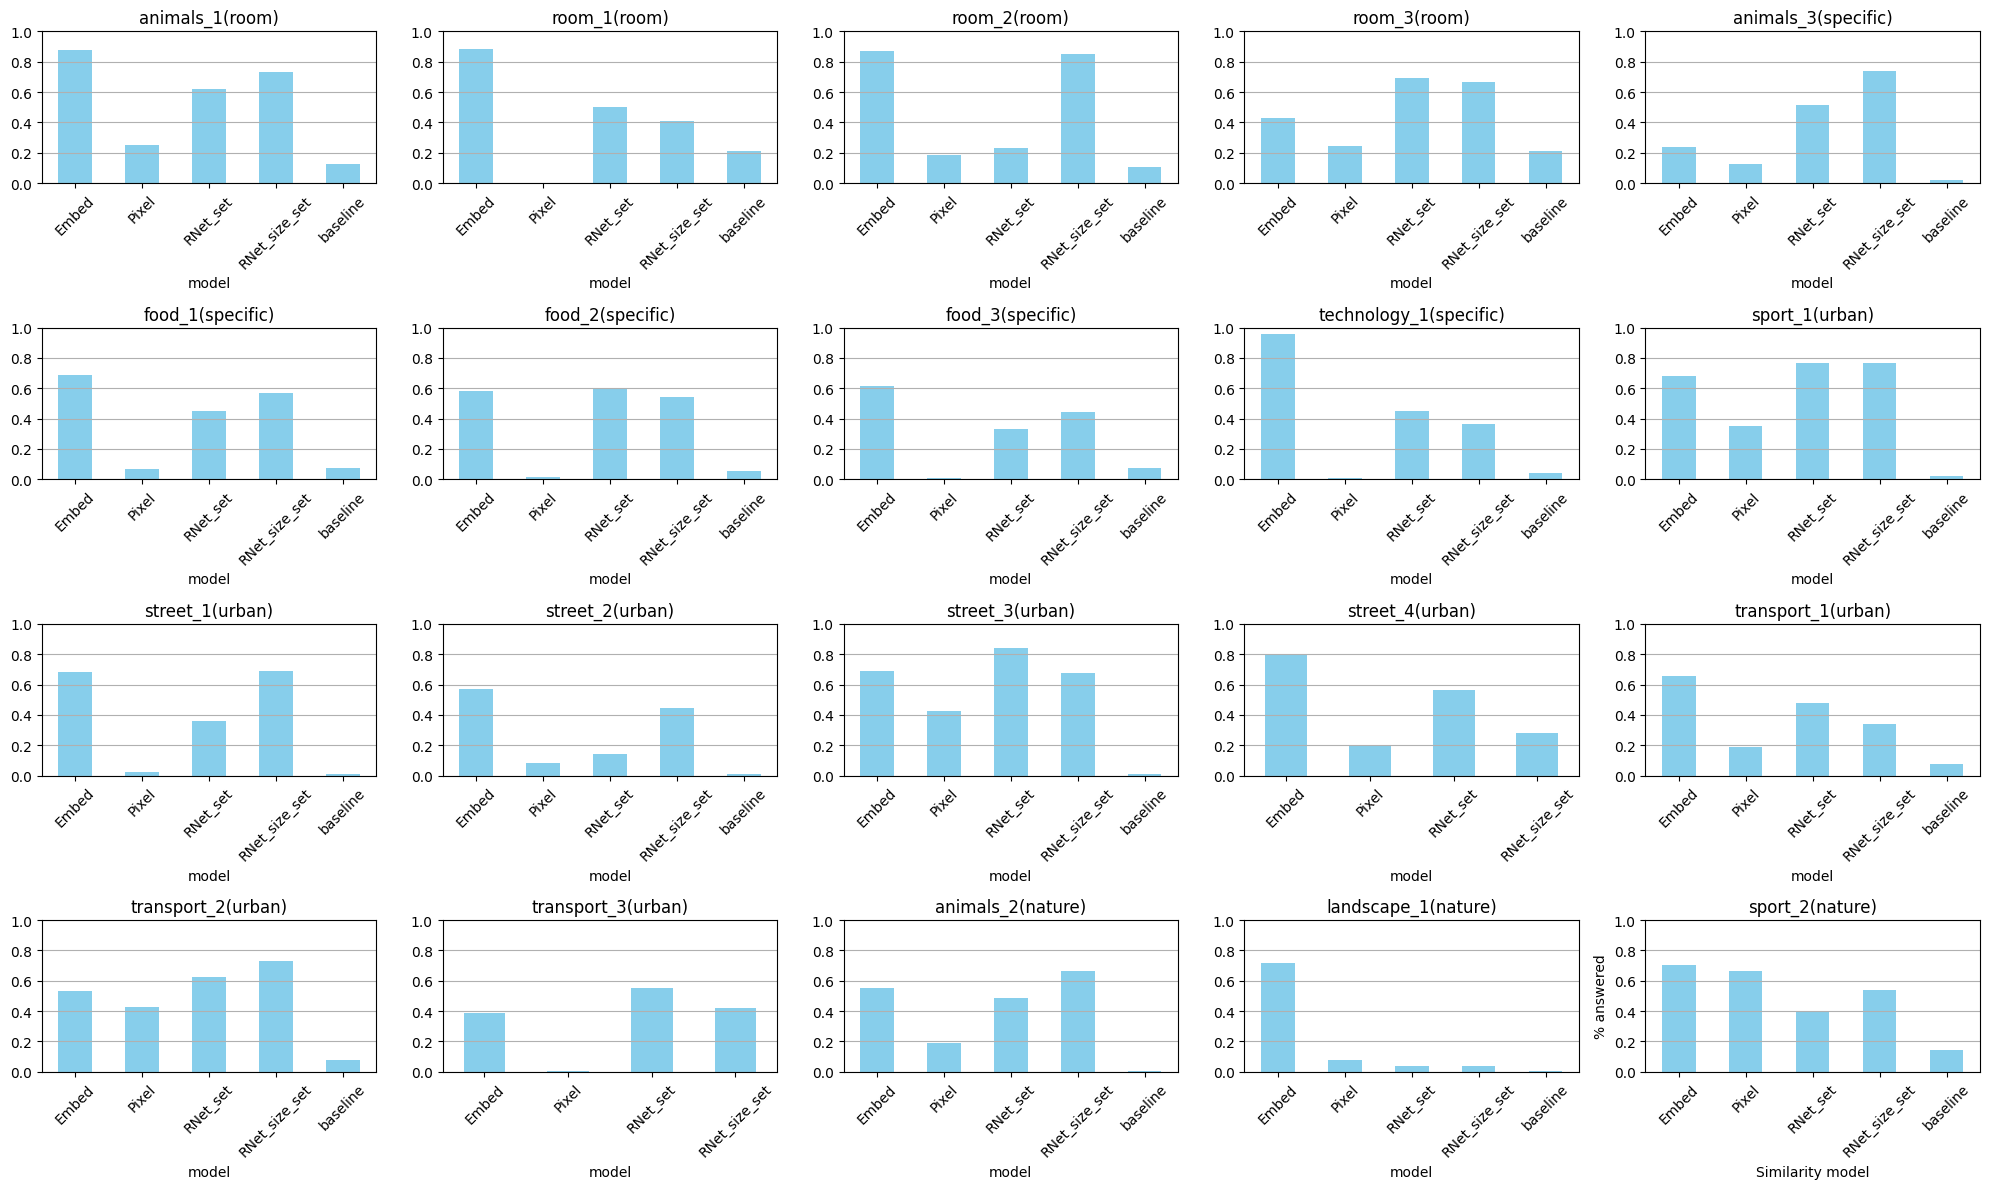

In [59]:
# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 5

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 12))  # Adjust figure size as needed

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each model
#for i, image in enumerate(final_df['image'].unique()):
for i, image in enumerate(np.array(image_order_by_type)):
    image_df = final_df[final_df['image'] == image]
    image_grouped = image_df.groupby(by='model').sum()['count']
    image_grouped_prop = image_grouped/(4*num_respuestas)
    # Plot the count for the current model
    ax = axs[i]
    image_grouped_prop.plot(kind='bar', ax=ax, color='skyblue')  # Adjust color as needed
    ax.set_title(image_order_with_type[i])
    plt.xlabel('Similarity model')
    plt.ylabel('% answered')
    ax.grid(axis='y')  # Add gridlines to y-axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
    ax.set_ylim(0, 1)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('sum_counts_by_image_sim.png')
plt.show()


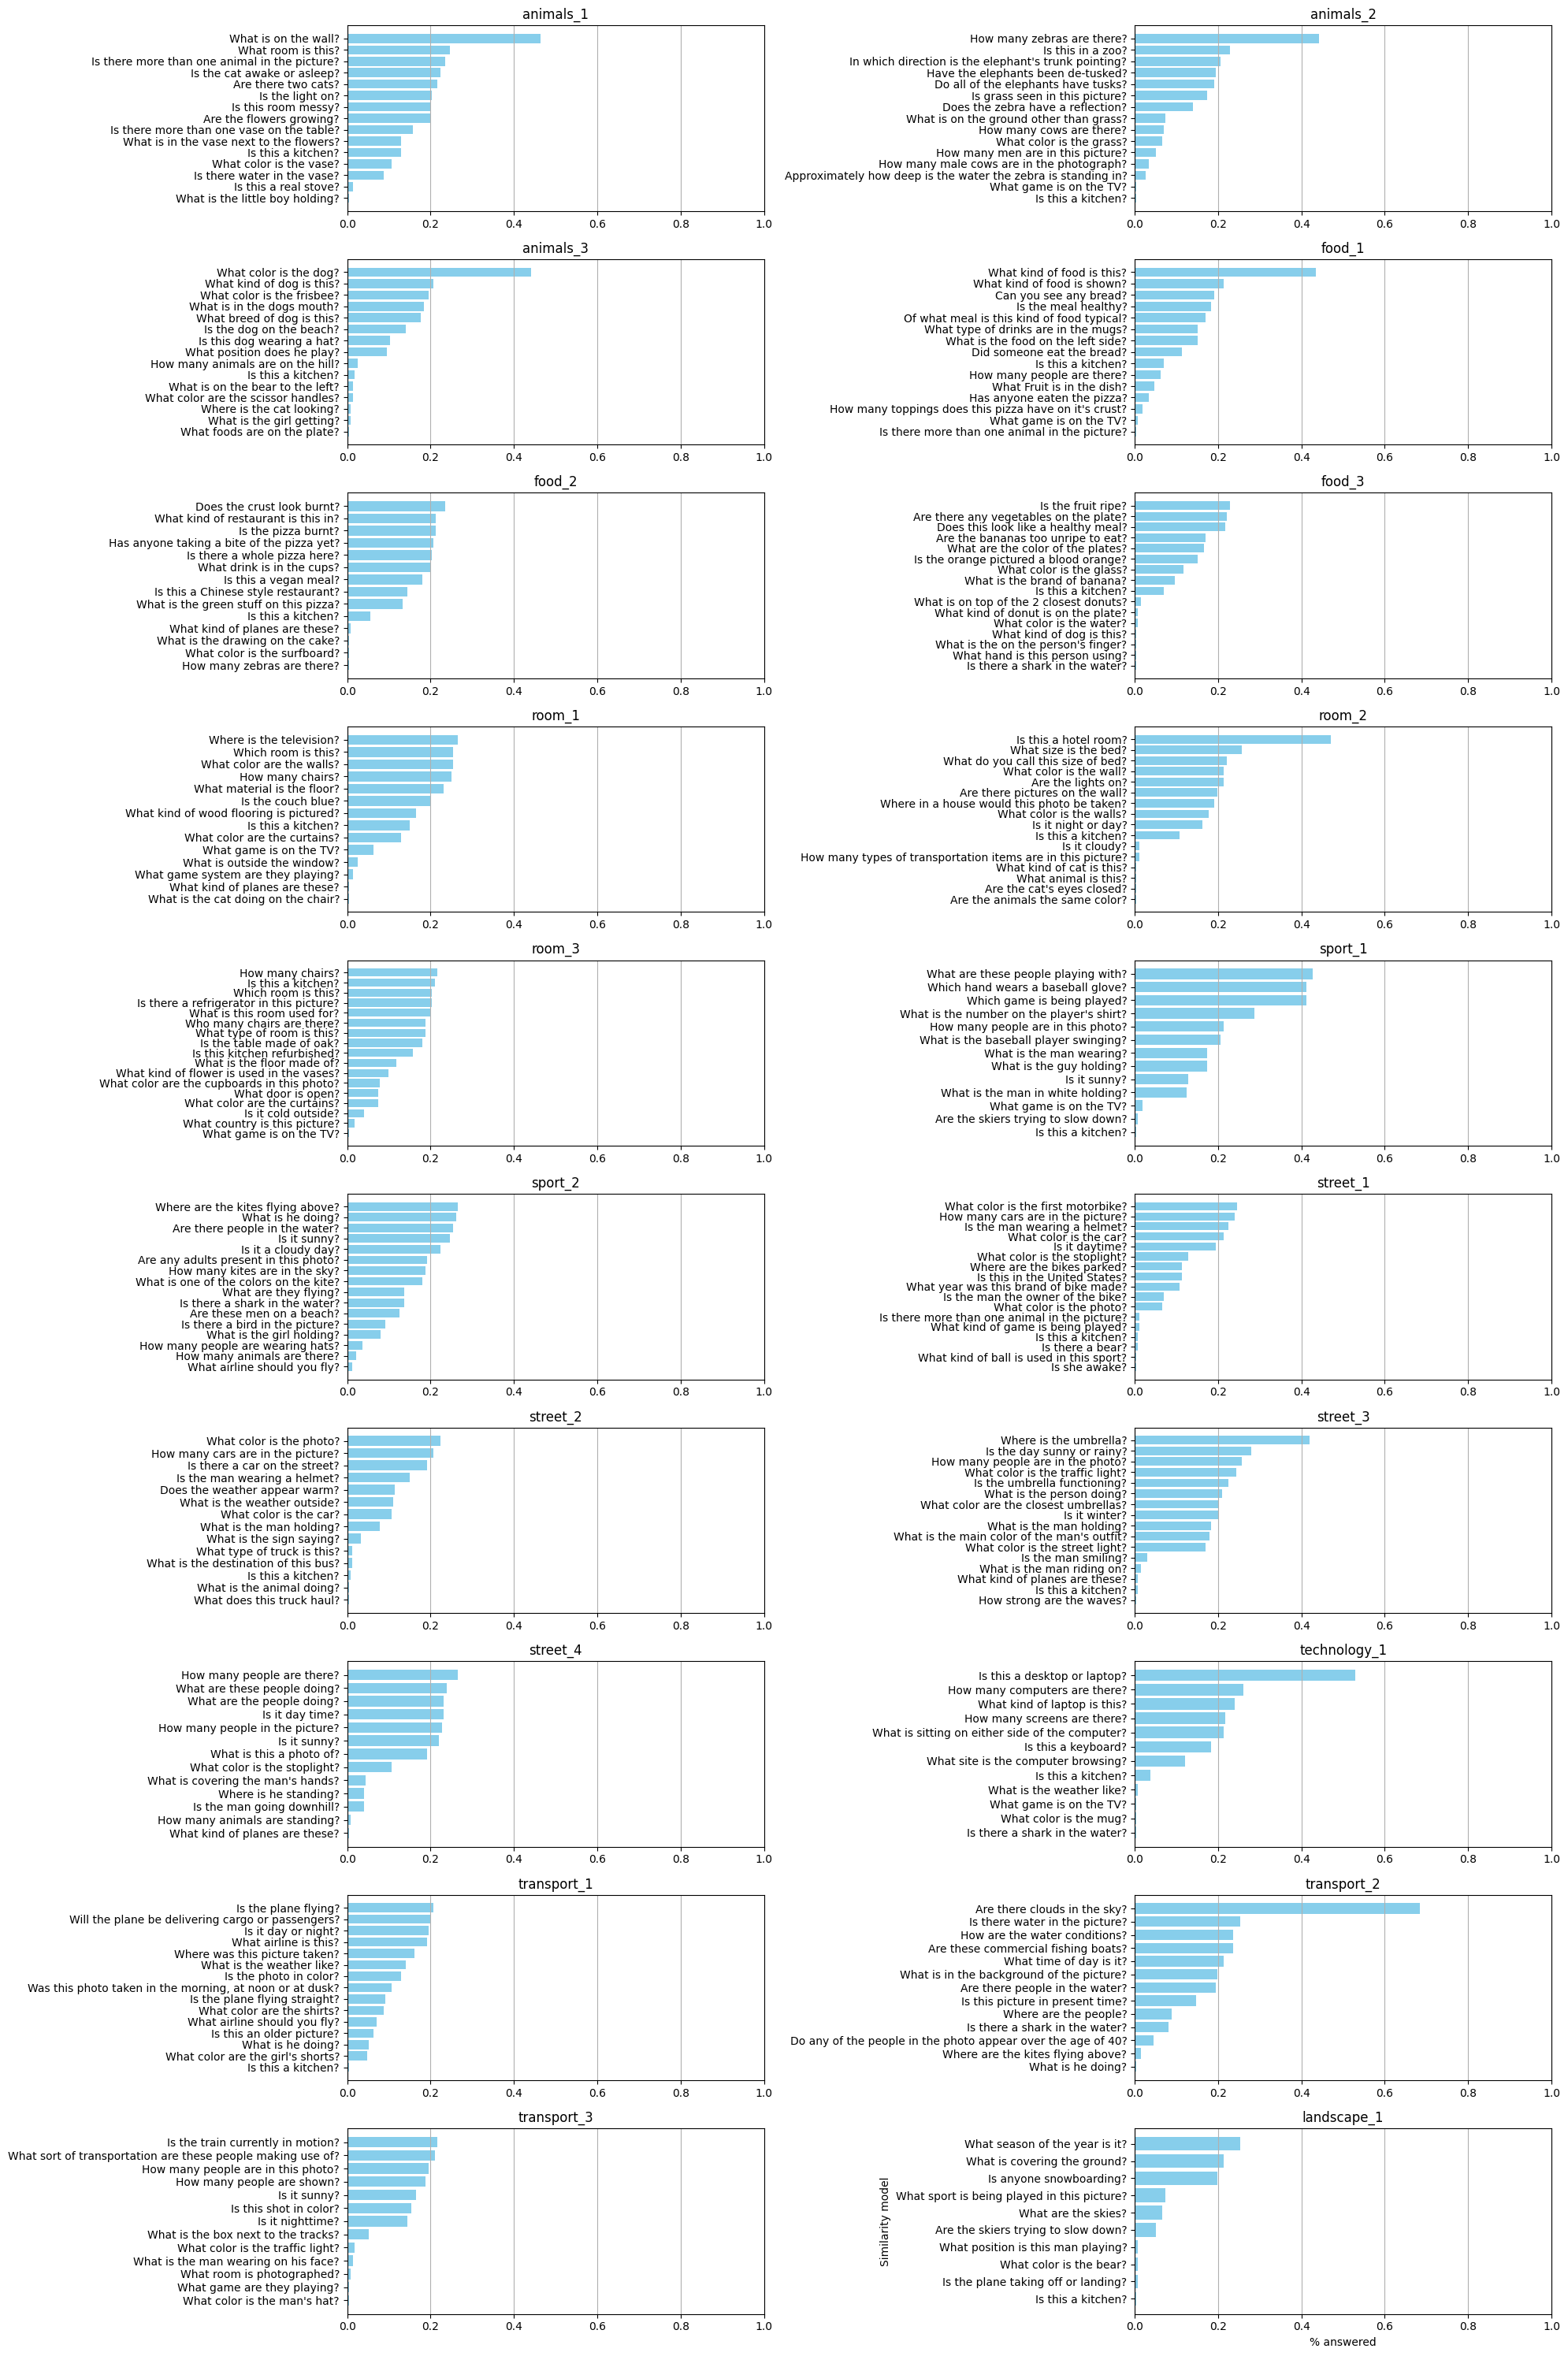

In [60]:
# Define the number of rows and columns for the grid
num_rows = 10
num_cols = 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 30))  # Adjust figure size as needed

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each model
for i, image in enumerate(final_df['image'].unique()):
    image_df = final_df[final_df['image'] == image]
    image_grouped = image_df.groupby(by='question').sum()['count']
    image_grouped_prop = image_grouped / (4 * num_respuestas)

    # Sort data by percentage answered (descending)
    image_grouped_prop_sorted = image_grouped_prop.sort_values(ascending=True)

    # Plot the sorted data as a horizontal bar plot
    ax = axs[i]
    bars = ax.barh(image_grouped_prop_sorted.index, image_grouped_prop_sorted.values, color='skyblue')
    ax.set_title(image)
    plt.ylabel('Similarity model')  # Adjust y-axis label
    plt.xlabel('% answered')  # Adjust x-axis label
    ax.grid(axis='x')  # Add gridlines to x-axis

    # Set y-axis ticks and labels based on the sorted data
    ax.set_yticks(image_grouped_prop_sorted.index)
    ax.set_yticklabels(image_grouped_prop_sorted.index, rotation=0)  # Adjust rotation if needed

    # Set x-axis limits based on percentage range
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('sum_counts_by_image_qs.png')
plt.show()

In [64]:
for type_ in final_df['type'].unique():
    print('--------------------------------------')
    print(f'{type_}\n')
    type_df =  final_df[final_df['type'] == type_]
    print(type_df.groupby(by='model').sum()['count']/(len(type_df['image'].unique())*4*num_respuestas))

--------------------------------------
interior

model
Embed            0.681781
Pixel            0.101716
RNet_set         0.488154
RNet_size_set    0.590686
baseline         0.103350
Name: count, dtype: float64
--------------------------------------
exterior

model
Embed            0.633690
Pixel            0.239973
RNet_set         0.477273
RNet_size_set    0.509024
baseline         0.032420
Name: count, dtype: float64


In [69]:
df_bymodel_prop

model
Embed            0.655331
Pixel            0.177757
RNet_set         0.482169
RNet_size_set    0.545772
baseline         0.064338
Name: count, dtype: float64

In [70]:
for subtype_ in final_df['subtype'].unique():
    print('--------------------------------------')
    print(f'{subtype_}\n')
    subtype_df =  final_df[final_df['subtype'] == subtype_]
    print(subtype_df.groupby(by='model').sum()['count']/(len(subtype_df['image'].unique())*4*num_respuestas))

--------------------------------------
interior_room

model
Embed            0.763787
Pixel            0.172794
RNet_set         0.511029
RNet_size_set    0.665441
baseline         0.165441
Name: count, dtype: float64
--------------------------------------
exterior_nature

model
Embed            0.656863
Pixel            0.311275
RNet_set         0.308824
RNet_size_set    0.414216
baseline         0.052696
Name: count, dtype: float64
--------------------------------------
interior_specific

model
Embed            0.616176
Pixel            0.044853
RNet_set         0.469853
RNet_size_set    0.530882
baseline         0.053676
Name: count, dtype: float64
--------------------------------------
exterior_urban

model
Embed            0.625000
Pixel            0.213235
RNet_set         0.540441
RNet_size_set    0.544577
baseline         0.024816
Name: count, dtype: float64
